In [36]:
print("hello world")

hello world


In [37]:
lst = [i for i in range(20)]
lst

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [38]:
name = input("What is your name ")
print("Hello", name)

What is your name Tj
Hello Tj


In [39]:
import random
lst = [random.randint(1,20) for i in range(50)]
len(lst)

50

In [40]:
lst

[16,
 15,
 8,
 17,
 3,
 17,
 7,
 3,
 1,
 3,
 15,
 6,
 6,
 8,
 6,
 14,
 7,
 9,
 10,
 9,
 7,
 8,
 1,
 20,
 18,
 16,
 17,
 3,
 12,
 1,
 2,
 8,
 19,
 20,
 10,
 14,
 3,
 8,
 4,
 19,
 2,
 20,
 18,
 11,
 4,
 6,
 10,
 13,
 11,
 9]

In [41]:
deduped = set(lst)
len(deduped)

19

In [42]:
import csv

#read in one of the files
data= []
with open ("/Users/tjkalapatapu/Desktop/ds2500/marathon/data/admission_rate.csv", "r") as infile:
    csvfile = csv.reader(infile)
    for row in csvfile:
        data.append(row)

In [43]:
import pandas as pd
df = pd.read_csv("/Users/tjkalapatapu/Desktop/ds2500/marathon/data/admission_rate.csv")
df

,Year,Admission Rate (Total),Admission Rate (Men),Admission Rate (Women)
0,2013,32.31,31.76,32.77
1,2014,32.22,32.08,32.34
2,2015,28.48,28.98,28.04
3,2016,28.88,29.13,28.66
4,2017,27.44,27.15,27.69
5,2018,19.34,18.93,19.68
6,2019,18.05,18.35,17.80
7,2020,20.48,20.81,20.19
8,2021,18.00,16.00,20.00


In [44]:
df.shape

(9, 4)

In [45]:
df.head()

,Year,Admission Rate (Total),Admission Rate (Men),Admission Rate (Women)
0,2013,32.31,31.76,32.77
1,2014,32.22,32.08,32.34
2,2015,28.48,28.98,28.04
3,2016,28.88,29.13,28.66
4,2017,27.44,27.15,27.69


In [46]:
df["Admission Rate (Total)"].describe()

count     9.000000
mean     25.022222
std       6.004654
min      18.000000
25%      19.340000
50%      27.440000
75%      28.880000
max      32.310000
Name: Admission Rate (Total), dtype: float64

In [47]:
df.loc[0]

Year                      2013.00
Admission Rate (Total)      32.31
Admission Rate (Men)        31.76
Admission Rate (Women)      32.77
Name: 0, dtype: float64

In [48]:
print(type(df.loc[0]))

<class 'pandas.core.series.Series'>


In [49]:
print(type(df["Admission Rate (Total)"]))

<class 'pandas.core.series.Series'>


In [50]:
df.head()

,Year,Admission Rate (Total),Admission Rate (Men),Admission Rate (Women)
0,2013,32.31,31.76,32.77
1,2014,32.22,32.08,32.34
2,2015,28.48,28.98,28.04
3,2016,28.88,29.13,28.66
4,2017,27.44,27.15,27.69


In [51]:
#drop a column we don't want
#axis = 0 by default (row), specify axis = 1 to drop a column
#doesnt work if you run it twice in a row because the column does not exist the second time 
df = df.drop("Admission Rate (Men)", axis = 1)

In [52]:
df.head()

,Year,Admission Rate (Total),Admission Rate (Women)
0,2013,32.31,32.77
1,2014,32.22,32.34
2,2015,28.48,28.04
3,2016,28.88,28.66
4,2017,27.44,27.69


In [ ]:
#another approach is to specify which columns to keep, rather than which columns to drop

In [53]:
df = df.drop("Admission Rate (Women)", axis = 1)
df.head()

,Year,Admission Rate (Total)
0,2013,32.31
1,2014,32.22
2,2015,28.48
3,2016,28.88
4,2017,27.44


In [54]:
#read in one more file
demo_df = pd.read_csv("/Users/tjkalapatapu/Desktop/ds2500/marathon/data/demographics.csv")
demo_df.head()

,Year,American Indian or Native American,Asian,Black,Hispanic,Native Hawaiian or Other Pacific Islander,White,Two or More Races
0,2013,15,"1,600",632,"1,066",3,"8,831",534
1,2014,10,"1,753",624,"1,103",7,"8,828",597
2,2015,13,"1,903",646,"1,116",5,"8,568",595
3,2016,13,"1,994",660,"1,160",4,"8,218",647
4,2017,9,"2,163",644,"1,296",2,"8,397",668


In [56]:
#do we need the column thave have commas?
#need to clean up for better results (remove commas)
demo_df["Hispanic"].describe()

count         9
unique        9
top       1,066
freq          1
Name: Hispanic, dtype: object

In [58]:
#want: ONE dataframe with the admission rate and demographic data
big_df = df.merge(demo_df)
big_df.head()

,Year,Admission Rate (Total),American Indian or Native American,Asian,Black,Hispanic,Native Hawaiian or Other Pacific Islander,White,Two or More Races
0,2013,32.31,15,"1,600",632,"1,066",3,"8,831",534
1,2014,32.22,10,"1,753",624,"1,103",7,"8,828",597
2,2015,28.48,13,"1,903",646,"1,116",5,"8,568",595
3,2016,28.88,13,"1,994",660,"1,160",4,"8,218",647
4,2017,27.44,9,"2,163",644,"1,296",2,"8,397",668


In [61]:
big_df = df.merge(demo_df)
big_df.head()

,Year,Admission Rate (Total),American Indian or Native American,Asian,Black,Hispanic,Native Hawaiian or Other Pacific Islander,White,Two or More Races
0,2013,32.31,15,"1,600",632,"1,066",3,"8,831",534
1,2014,32.22,10,"1,753",624,"1,103",7,"8,828",597
2,2015,28.48,13,"1,903",646,"1,116",5,"8,568",595
3,2016,28.88,13,"1,994",660,"1,160",4,"8,218",647
4,2017,27.44,9,"2,163",644,"1,296",2,"8,397",668


<Axes: >

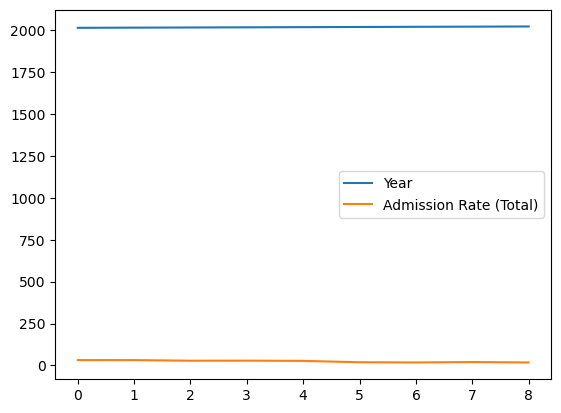

In [62]:
import seaborn as sns
big_df[["Year", "Admission Rate (Total)", "Black"]].plot()